# MusicLab Vol.4

## Raw Data - Processing and Visualization

In [1]:
import sys

In [2]:
!{sys.executable} -m pip install sensormotion

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install numpy==1.13.3

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!{sys.executable} -m pip install plotly==4.2.1

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!{sys.executable} -m pip install ipywidgets>=7.2

You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
#!{sys.executable} -m pip uninstall plotly --yes

Uninstalling plotly-4.2.1:
  Successfully uninstalled plotly-4.2.1


In [6]:
import pandas as pd
import numpy as np
import matplotlib
import random
%matplotlib inline
import csv

import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg 

from scipy import stats
import seaborn as sns
from IPython.display import display, Markdown

import sensormotion as sm
import plotly.express as px

In [37]:
# Importing data. Location of MusicLab data folder is needed.

num_participants = 13
duration = 17000 #in samples

sampling = 0.01

mlv4 = {}

mlv4[1] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/1.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[2] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/2.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[3] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/3.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[4] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/4.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[5] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/5.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[6] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/6.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[7] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/7.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[8] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/8.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[9] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/9.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[10] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/10.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[11] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/M1.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[12] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/M2.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
mlv4[13] = pd.read_csv('/Users/vesanche/Desktop/MusicLabVol4 Data/M3.csv', delimiter=',', encoding='utf-8', na_filter=False, names=['Time (s)', 'X', 'Y', 'Z'])
for p_id in range(1,num_participants+1):
    mlv4[p_id] = mlv4[p_id][0:170000]

for p_id in range(1,num_participants+1):
    mlv4[p_id].index =  mlv4[p_id]['Time (s)'][:]
    mlv4[p_id].drop(['Time (s)'], axis=1,inplace=True)

In [38]:
len(mlv4[1])

170000

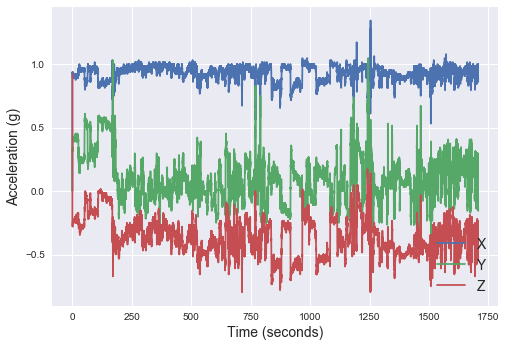

In [39]:
#Raw Data from one participant
plt.plot(mlv4[13].X, label='X')
plt.plot(mlv4[13].Y, label='Y')
plt.plot(mlv4[13].Z, label='Z')
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Acceleration (g)', fontsize=14)
plt.legend(loc='lower right', fontsize=14)


In [10]:
# SignalVectorMagnitude, calculating vector magnitude independent of orientation, removing the impact of gravity
from numpy import linalg as LA
svm = {}
for p_id in range(1,num_participants+1):
    svm[p_id] = LA.norm(mlv4[p_id], ord=1, axis=1)


In [11]:
# Filtering raw data for frequencies of human movement

from scipy.signal import butter, lfilter
fs = 100
f_low = 0.5
f_high = 12

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



In [44]:
time = np.arange(0, 1700, 0.01)
len(time)

170000

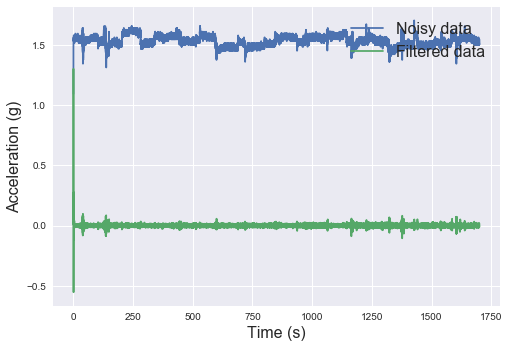

In [45]:
filtered = {}
filtered_x = {}
filtered_y = {}
filtered_z = {}

for p_id in range(1,num_participants+1):
    filtered[p_id] = butter_bandpass_filter(svm[p_id], f_low, f_high, fs, order=4)
    filtered_x[p_id] = butter_bandpass_filter(mlv4[p_id].X, f_low, f_high, fs, order=4)
    filtered_y[p_id] = butter_bandpass_filter(mlv4[p_id].Y, f_low, f_high, fs, order=4)
    filtered_z[p_id] = butter_bandpass_filter(mlv4[p_id].Z, f_low, f_high, fs, order=4)

#Plotting raw and filtered data from one participant
plt.plot(time, svm[1], label='Noisy data')
plt.plot(time, filtered[1], label='Filtered data')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Acceleration (g)', fontsize=16)

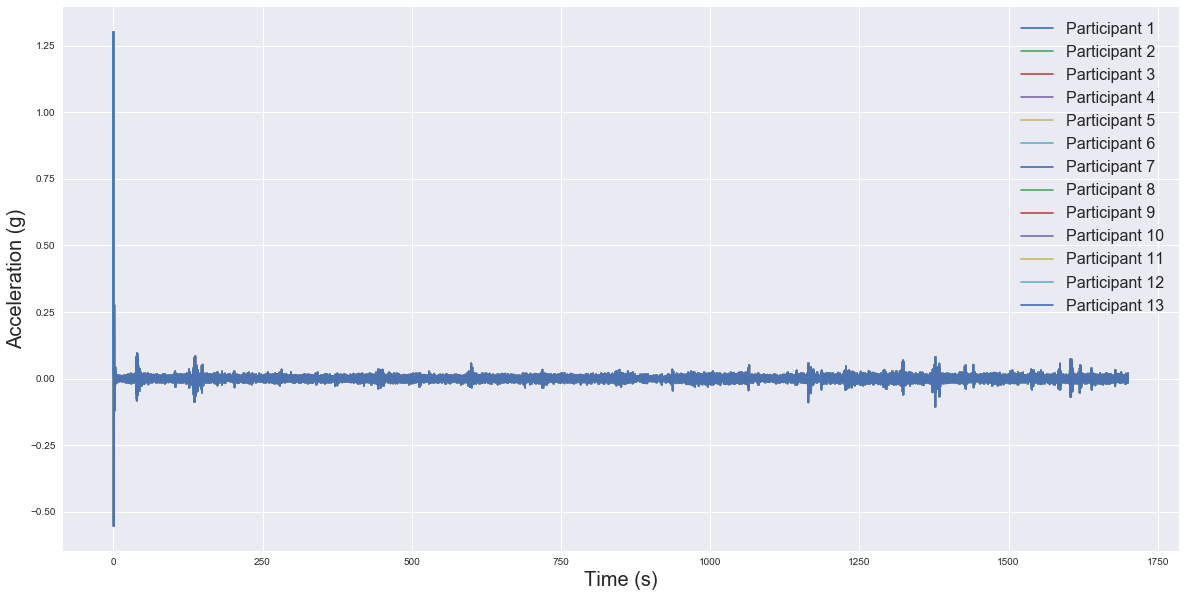

In [46]:
#Plotting filtered data from all participants
plt.figure(figsize=(20,10))

for p_id in range(1,num_participants+1):
    plt.plot(time, filtered[1], label='Participant %s' % p_id)


plt.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Acceleration (g)', fontsize=20)

## Physical Activity Counts

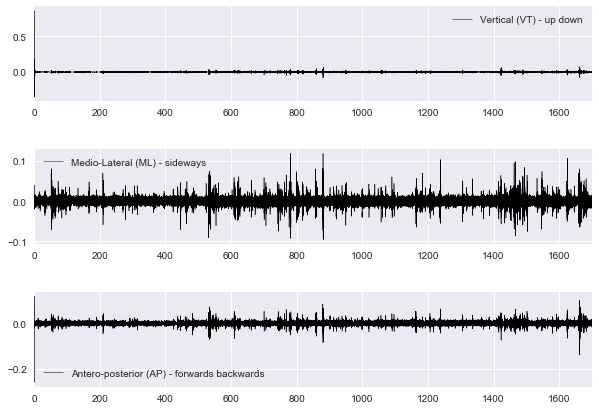

In [47]:
#Plotting axis data from one participant

sm.plot.plot_signal(time, [{'data': filtered_x[10], 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': filtered_y[10], 'label': 'Medio-Lateral (ML) - sideways', 'line_width': 0.5},
                           {'data': filtered_z[10], 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))


In [51]:
#Physical activity counts for all participants, per minute (counting physical activity events every 60s). 
#In the three directions

x_counts = {}
y_counts = {}
z_counts = {}

for p_id in range(1,num_participants+1):
    x_counts[p_id] = sm.pa.convert_counts(filtered_x[p_id], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=False)
    y_counts[p_id] = sm.pa.convert_counts(filtered_y[p_id], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=False)
    z_counts[p_id] = sm.pa.convert_counts(filtered_z[p_id], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=False)
    
    

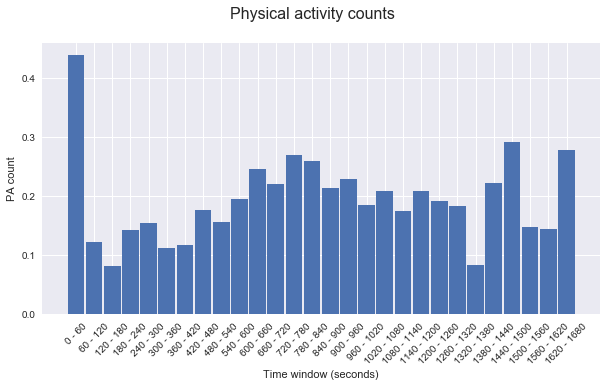

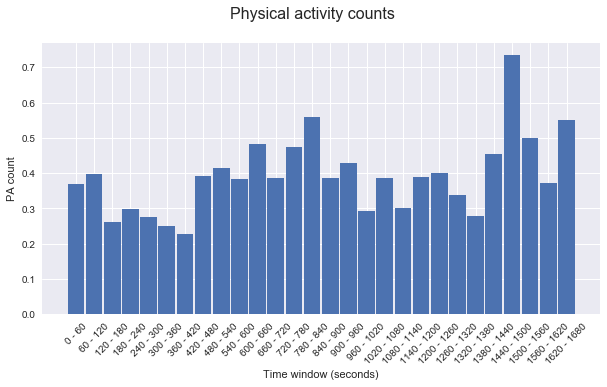

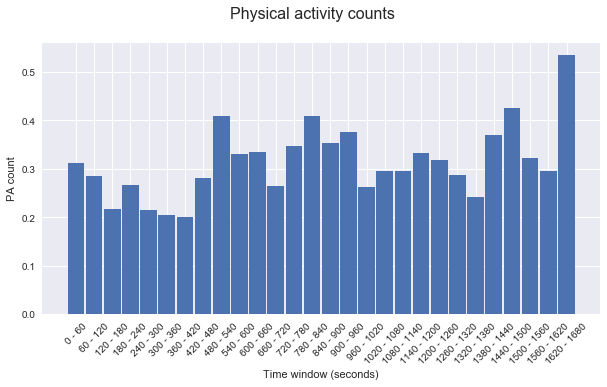

In [53]:
#Plotting Physical activity counts for one participant. Every minute. X, Y, Z directions
x_counts[1] = sm.pa.convert_counts(filtered_x[10], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=True)
y_counts[1] = sm.pa.convert_counts(filtered_y[10], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=True)
z_counts[1] = sm.pa.convert_counts(filtered_z[10], time, time_scale='s', epoch=60, rectify='full', integrate='simpson', plot=True)

## Categorizing Physical Activity Intensity

In [54]:
#Calculating vector magnitude (vm) of counts

vm = {}

for p_id in range(1,num_participants+1):
    vm[p_id] = sm.signal.vector_magnitude(x_counts[p_id], y_counts[p_id], z_counts[p_id])

    

Cut-point set: freedson_adult (axis count: 3)...
light: -inf to 2690
moderate: 2691 to 6166
vigorous: 6167 to 9642
very vigorous: 9643 to inf


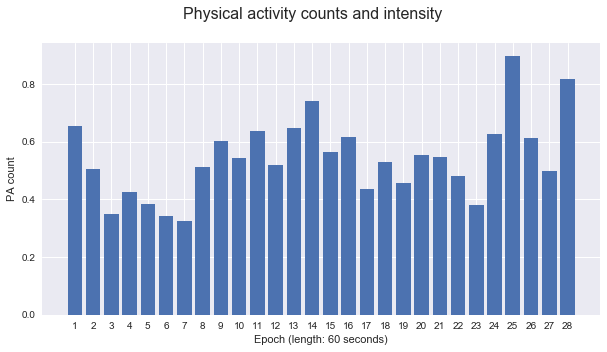

In [57]:
#Categorizing activity for one participant. Based on thresholds found in literature. 
#(Light, moderate, vigourous, very vigourous)
categories, time_spent = sm.pa.cut_points(vm[1], set_name='freedson_adult', n_axis=3, plot=True)

In [58]:
#Concatenating filtered data for all participants in each direction
filtered_df = pd.DataFrame(filtered,index=time)
filtered_df_x = pd.DataFrame(filtered_x,index=time)
filtered_df_y = pd.DataFrame(filtered_y,index=time)
filtered_df_z = pd.DataFrame(filtered_z,index=time)

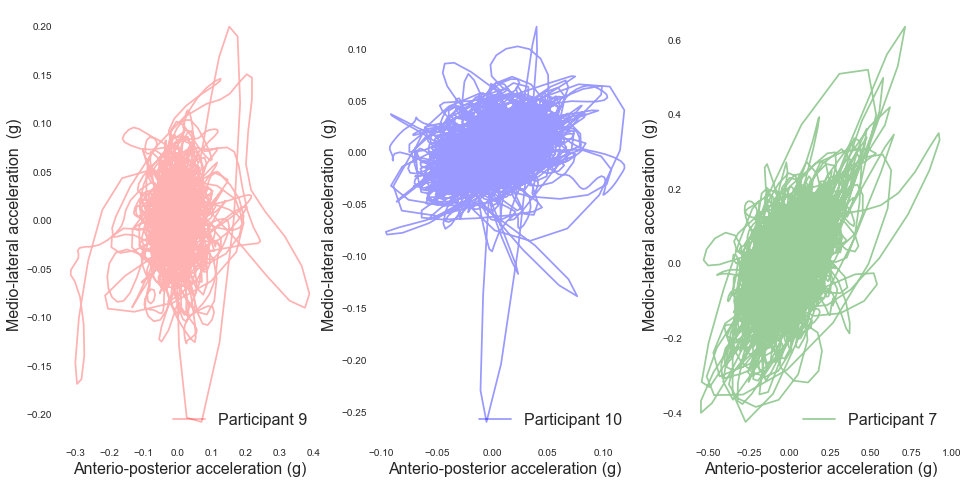

In [59]:
#Comparing three participants planar acceleration
s = 9

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(1, 3, 1)
plt.plot(filtered_y[s], filtered_z[s], color='red',alpha=0.3, label='Participant %s' % s)
plt.legend(loc='lower right', fontsize=16)
plt.xlabel('Anterio-posterior acceleration (g)',fontsize=16)
plt.ylabel('Medio-lateral acceleration  (g)',fontsize=16)
ax1.set_facecolor("white")

s = 10
ax2 = plt.subplot(1, 3, 2)
plt.plot(filtered_y[s], filtered_z[s], color='blue',alpha=0.4, label='Participant %s' % s)
plt.legend(loc='lower right', fontsize=16)
plt.xlabel('Anterio-posterior acceleration (g)',fontsize=16)
plt.ylabel('Medio-lateral acceleration  (g)',fontsize=16)
ax2.set_facecolor("white")


s = 7

ax3 = plt.subplot(1, 3, 3)
plt.plot(filtered_y[s], filtered_z[s], color='green',alpha=0.4, label='Participant %s' % s)
plt.legend(loc='lower right', fontsize=16)
plt.xlabel('Anterio-posterior acceleration (g)',fontsize=16)
plt.ylabel('Medio-lateral acceleration  (g)',fontsize=16)
ax3.set_facecolor("white")




In [133]:
#Rectifying accelerations
rectified = abs(filtered_df)
rectified_x = abs(filtered_df_x)
rectified_y = abs(filtered_df_y)
rectified_z = abs(filtered_df_z)

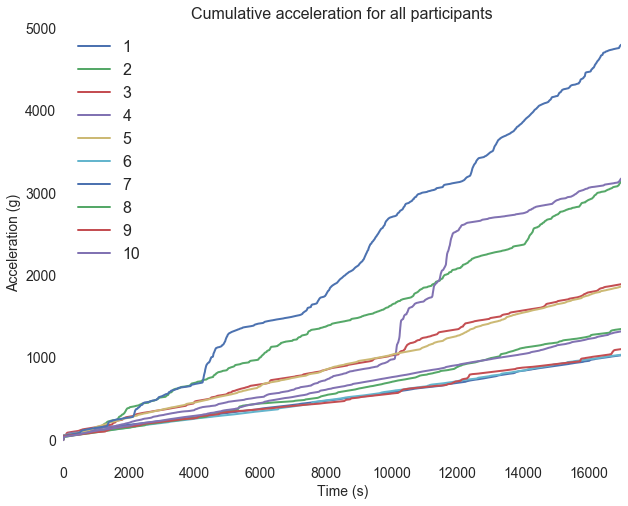

In [134]:
#Cumulative acceleration

ax = rectified.cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Acceleration (g)', fontsize=14);
plt.legend(loc='upper left', fontsize=16)
plt.title('Cumulative acceleration for all participants', fontsize=16)
ax.set_facecolor("white")

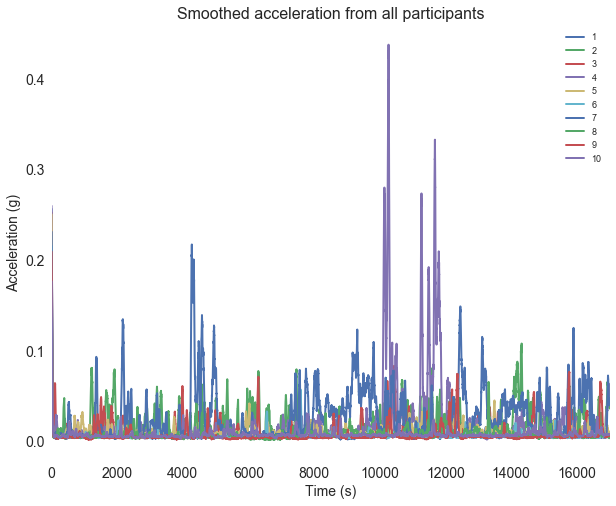

In [135]:
#Smoothing data

smooth = rectified.rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
smooth_x = rectified_x.rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
smooth_y = rectified_y.rolling(400,center=True,win_type='boxcar',min_periods=1).mean()
smooth_z = rectified_z.rolling(400,center=True,win_type='boxcar',min_periods=1).mean()

ax4 = smooth.plot(figsize=(10,8), linewidth=2, fontsize=14)
ax4.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Acceleration (g)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Smoothed acceleration from all participants', fontsize=16)

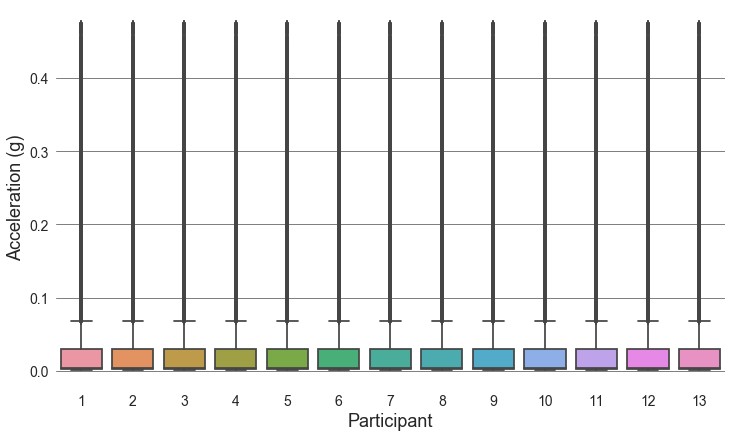

In [55]:
#Box plots

figbox, axbox = plt.subplots(figsize=(12,7))
accbox = sns.boxplot(ax=axbox, data=smooth, width=0.8)
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
accbox.set_xlabel("Participant",fontsize=18)
accbox.set_ylabel("Acceleration (g)",fontsize=18)
accbox.tick_params(labelsize=14)
